# Introduction notebook for machine learning
The purpose of this notebook is to provide the reader with a insight into how one can analyze and train a machine learning model for the area prediction case. However, it is not mandatory to follow the steps in this notebook, it is just a resource with suggestiongs for the reader.

The notebook will explain the following concepts:
* [Importing the data](#Importing-the-data)
* [Understanding the data](#Understanding-the-data)
* [Feature engineering & data cleaning](#Feature-engineering-&-data-cleaning)
* [Training a machine learning model](#Training-a-machine-learning-model)
* [Evaluate the machine learning model](#Evaluate-the-machine-learning-model)

## Case
*A more detailed description of the case can be found in the case document.*

The teams are given a dataset with customer requirements, such as number of employees, number of meeting rooms, etc. The goal is to predict the total area for the building given these parameters and present the results in the end of the competition. 

## Questions
If the teams have any questions feel free to come and talk with us. It can be anything from coding help, discussion about possible solution, or to ask us about the weather.

![A bad meme encouraging you to ask us questions](./img/ask_us_questions.jpg)

## About the comments
This notebooks code was updated for the new dataset. However, the comments where not completed

## Setup
We start by importing all necessary packages. These can be installed by using the pip command by running 

```
pip install -r .\path\to\requirements.txt
``` 

If you have not used pip before I would suggest reading this article: https://datatofish.com/install-package-python-using-pip/

Feel free to use any package you find suiting for your solution. These are just some recommendation from our side.

In [1]:
import pandas as pd             # for data analysis
import numpy as np              # for number manipulations
import matplotlib.pyplot as plt # for making graphs
import seaborn as sns           # for making the graphs look nice
import sklearn                  # for machine learning models
from sklearn.model_selection import train_test_split # for splitting into train and test datasets

np.random.seed(1) #remove the randomness
sns.set_style('darkgrid') #https://seaborn.pydata.org/generated/seaborn.set_style.html

## Importing the data
The dataset used for training and testing will be provided in a CSV format. One can use pandas functionality to import the data as a dataframe.

```
dataset = pd.read_csv(".\path\to\dataset.csv")
```

In [2]:
dataset = pd.read_csv("./dataset_v3-difficult.csv")

**Splitting into training and testing dataset**

One should split the dataset into two different datasets, one for training and one for testing. The reason one should have a testing dataset is to validate the machine learning model on data that the model had **not seen before**.

However, it might be benefical to do this stage later as it will be easier to do feature engineering one the whole dataset, and then splitt it.

In [3]:
training_dataset, testing_dataset = train_test_split(dataset, test_size=0.2, shuffle=True)

## Understanding the data
An important part before training a machine learning model is to understand the data. This will give you a better understanding on which models and methods is best suited for the given problem, and what kinds of modifications are required on the dataset.

This stage is often called exploritory data analysis and is a part of the data preprosessing. In this notebook a basic overview of the data will be given. For a good example on EDA on the famous titanic dataset one should read [Ashwini Swain's notebook over on kaggle](https://www.kaggle.com/ash316/eda-to-prediction-dietanic).

**Note:** In this notebook a not finished dataset has been used, therefore some of the attributes will reflect the missing fields.

In [4]:
dataset.head()

,id,nr_employees,nr_closed_cubicles,nr_meeting_room_total_occupancy,industry,city,sqm_social_zones,sqm_net_area
0,0,31,6,6,tech,Oslo,77,231
1,1,60,13,17,tech,Bergen,177,448
2,2,35,8,7,tech,Trondheim,90,423
3,3,167,90,40,finance,Oslo,617,2947
4,4,51,28,10,finance,Bergen,145,772


In [5]:
dataset.describe()

,id,nr_employees,nr_closed_cubicles,nr_meeting_room_total_occupancy,sqm_social_zones,sqm_net_area
count,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000
mean,1000.000000,73.186907,86.959520,66.245377,283.769115,1346.761119
std,577.783264,40.334514,2234.956937,2235.161398,2235.842021,856.414023
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,500.000000,44.000000,12.000000,10.000000,120.000000,706.000000
50%,1000.000000,65.000000,23.000000,15.000000,196.000000,1168.000000
75%,1500.000000,91.000000,48.000000,21.000000,296.000000,1750.000000
max,2000.000000,250.000000,100000.000000,100000.000000,100000.000000,4621.000000


**What do we see?**

From the describe we can see that there are 501 datapoints currently (see count under id). We also see that none of the fields have missing values, since all of them have a count of 501.

There are two suspicious max values, sqm_social_zones and netto_area. We see that the max netto_area is 549, which is almost dobble the 75%. We also see that on sqm_social_zones, that the max is more than dobble of 75%. Both of these does not have to mean anything, but they can also be outliers that should be removed.

From the ```dataset.head()``` we see that industry and city is categorical values, this means they are not numbers but rather classes they fit into. For a linear regression model, these have to either be removed or changed to a numberic value.

We also see that the dataset has a unique id for each datapoint, these should be removed as this will prevent the machine learning model overfitting the dataset.

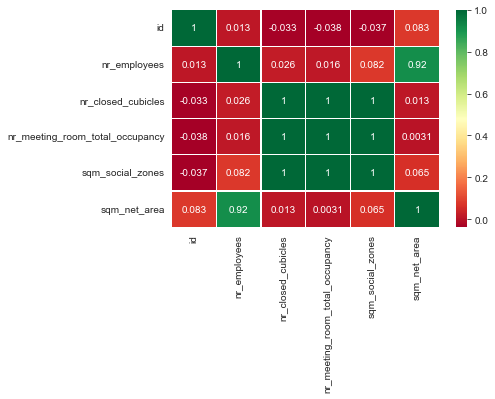

In [6]:
sns.heatmap(dataset.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)

**Heatmap**

A heatmap is a useful tool to visualize corrulation between different attributes in a dataset. In this example a [pearson correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) matrix has been calculated, which means it will calculate a score between -1 and 1 on how linearly corrulated the attributes are. Both -1 and 1 means a perfect linear corrulation.

We can see from the heatmap that all attribute has a high linear corrulation with netto_area. However, we also see that sqm_social_zones almost has a 1 in correlation coefficient, so this will be an important feature for a linear regression model.

### Industry
In this subsection, the industry attribute of the dataset will be explored.

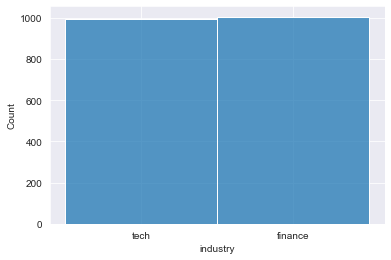

In [7]:
sns.histplot(data=dataset, x="industry")

**What do we see?**

We see that there are two industries when the notebook was created. We also see that there is almost a 50-50 splitt between tech and finance.

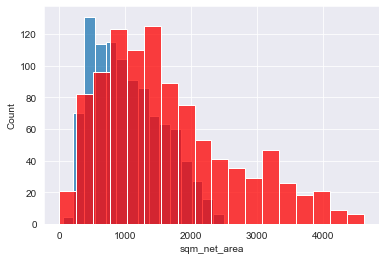

In [8]:
sns.histplot(data=dataset[(dataset['industry'] == 'tech')], x="sqm_net_area")
sns.histplot(data=dataset[(dataset['industry'] == 'finance')], x="sqm_net_area", color="red")

**What do we see?**

We see that both the tech and finance industry has a similar distrubution of netto_area.

### City
In this subsection, the city attribute of the dataset will be explored.

In [9]:
dataset['city'].unique()

array(['Oslo', 'Bergen', 'Trondheim'], dtype=object)

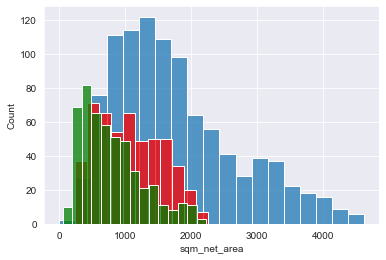

In [10]:
sns.histplot(data=dataset[(dataset['city'] == 'Oslo')], x="sqm_net_area")
sns.histplot(data=dataset[(dataset['city'] == 'Bergen')], x="sqm_net_area", color="red")
sns.histplot(data=dataset[(dataset['city'] == 'Trondheim')], x="sqm_net_area", color="green")

### Sqm_social_zone
In this subsection, the square meter of socal zone will be explored. We already see from the heatmap that this will have a high correlation with netto_area.

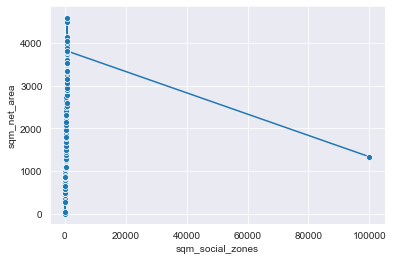

In [11]:
sns.lineplot(data=dataset, x='sqm_social_zones', y='sqm_net_area', marker='o')

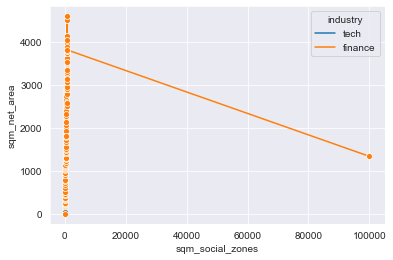

In [12]:
sns.lineplot(data=dataset, x='sqm_social_zones', y='sqm_net_area', hue='industry', marker='o')

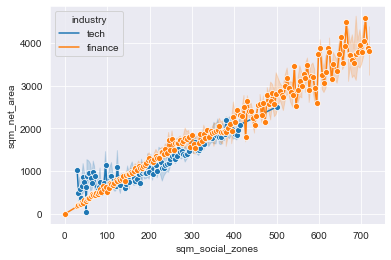

In [13]:
sns.lineplot(data=dataset[(dataset['sqm_social_zones'] < 20000)], x='sqm_social_zones', y='sqm_net_area', hue='industry', marker='o')

**What do we see?**

We can see that there are a linear correlation between netto_area and sqm_social_zones, but we also see that there are some points that are far away from the line. We also see that there are less datapoints when sqm_social_zones > 50. It might be benefical to cut of the data there.

The second plot shows that there are still a linear correlation when taking indutry into account. However the noise in the finance industry on the data becomes more visuable.

We also know that netto_area = sqm_social_zones + something else. So one can create a linear model to predict the rest and then add sqm_social_zones. This is the same as forcing the weight for sqm_social_zones to 1.

### nr_employees
In this subsection, number of employees will be explored. It makes logical sense that a higher number of employees will correlate with a higher square meter requirement.

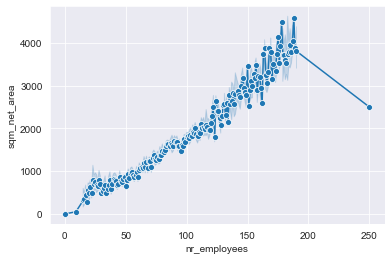

In [14]:
sns.lineplot(data=dataset, x='nr_employees', y='sqm_net_area', marker='o')

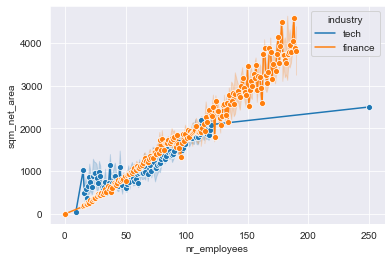

In [15]:
sns.lineplot(data=dataset, x='nr_employees', y='sqm_net_area', hue='industry', marker='o')

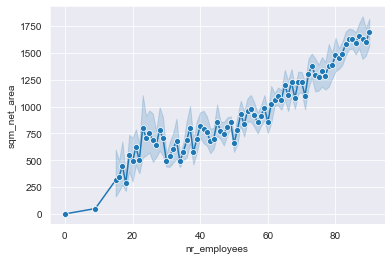

In [16]:
sns.lineplot(data=dataset[(dataset['nr_employees'] <= 90)], x='nr_employees', y='sqm_net_area', marker='o')

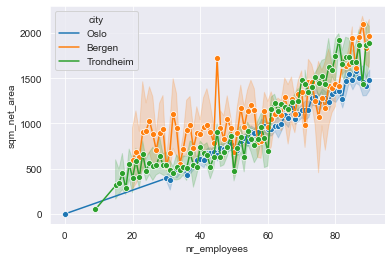

In [73]:
sns.lineplot(data=dataset[(dataset['nr_employees'] <= 90)], x='nr_employees', y='sqm_net_area', hue='city', marker='o')

**What do we see?**

We can see that there is a linear correlation when there are a lower number of employees, but when the number increases the noise also starts to increase. However, there are multiple points close to the extreme points, so one cannot just remove them. Moreover we can see that there is an outlier on 100 employees, this can be removed.

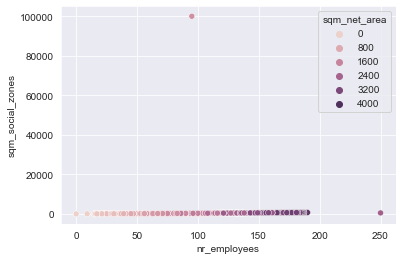

In [17]:
sns.scatterplot(data=dataset, x='nr_employees', y='sqm_social_zones', hue='sqm_net_area', marker='o')

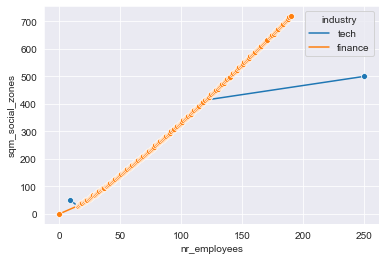

In [18]:
sns.lineplot(data=dataset[(dataset['sqm_social_zones'] < 80_000)], x='nr_employees', y='sqm_social_zones', hue='industry', marker='o')

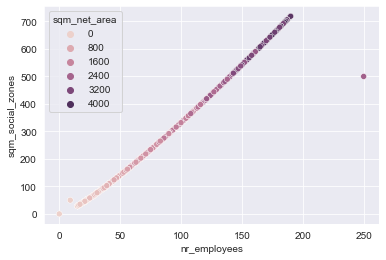

In [19]:
sns.scatterplot(data=dataset[(dataset['sqm_social_zones'] < 80_000)], x='nr_employees', y='sqm_social_zones', hue='sqm_net_area', marker='o')

**What do we see?**

We see that a increase in both nr_employees and sqm_social_zones shows a increase in netto_area. However, we also see that a increase in nr_employees corrulate with a increase in sqm_social_zones. This also makes logical sense, so the nr_employees will be weighted in both sqm_social_zones and nr_employees, but they are both good attribute to use since most of the other attributes also are related to nr_employees.

### nr_closed_cubicles
In this subsection, number of closed cubicles will be explored

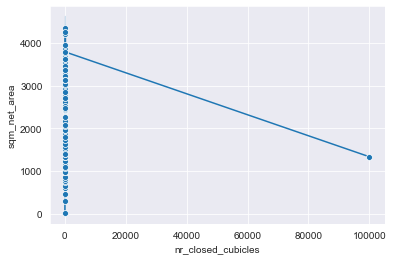

In [20]:
sns.lineplot(data=dataset, x='nr_closed_cubicles', y='sqm_net_area', marker='o')

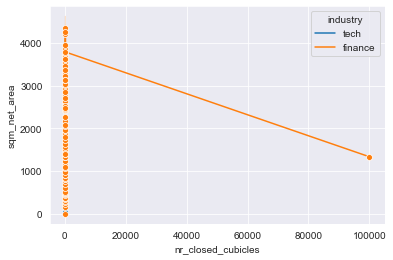

In [21]:
sns.lineplot(data=dataset, x='nr_closed_cubicles', y='sqm_net_area', hue='industry', marker='o')

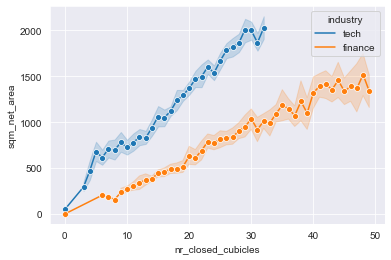

In [22]:
sns.lineplot(data=dataset[(dataset['nr_closed_cubicles'] < 50)], x='nr_closed_cubicles', y='sqm_net_area', hue='industry', marker='o')

**What do we see?**

We see that there are a linear correlation between number of cubicals and netto_area regardsless of netto_area. We can see that the linear correlation breaksdown at higer nr of closed cubicles, especially in the financial industry.

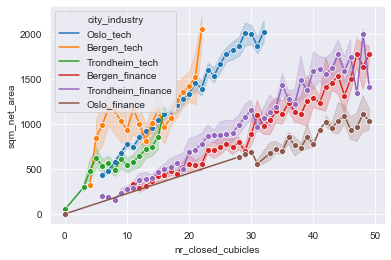

In [80]:
sns.lineplot(
    data=city_industry_dataset[(city_industry_dataset['nr_closed_cubicles'] < 50 )], 
    x='nr_closed_cubicles', y='sqm_net_area', hue='city_industry', marker='o')

### occupancy_meeting_room
In this subsection, occupancy meeting room will be explored.

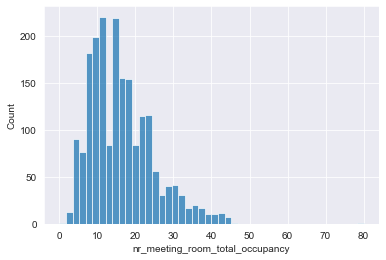

In [23]:
sns.histplot(data=dataset[(dataset['nr_meeting_room_total_occupancy'] < 80_000)], x="nr_meeting_room_total_occupancy")

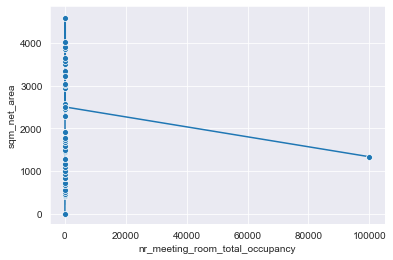

In [24]:
sns.lineplot(data=dataset, x='nr_meeting_room_total_occupancy', y='sqm_net_area', marker='o')

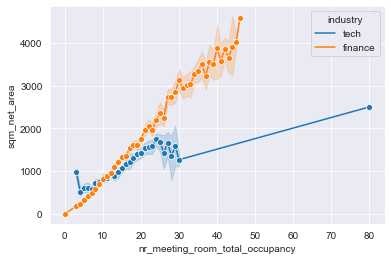

In [25]:
sns.lineplot(data=dataset[(dataset['nr_meeting_room_total_occupancy'] < 80_000)], x='nr_meeting_room_total_occupancy', y='sqm_net_area', hue='industry', marker='o')

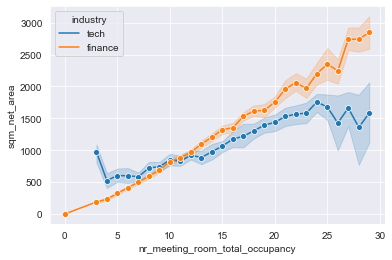

In [26]:
sns.lineplot(data=dataset[(dataset['nr_meeting_room_total_occupancy'] < 30)], x='nr_meeting_room_total_occupancy', y='sqm_net_area', hue='industry', marker='o')

**What do we see?**

We can see that there a linear correlation also between occupancy_meeting_room and netto_area. However, there are some outliers on when the occupancy_meeting_rooms is above 30. These should therefore be removed.

## Feature engineering & data cleaning

Not all features from the dataset might be relevant for your model, and multiple features my describe the same information. It will be benefical to remove these duplicates, since the model will be weighted more towards them. 

Some datapoints can be combined into one more useful feature, i.e. radius from city center instead of longitude and latitude.

The dataset is also not perfect. There can be missing fields. We will therefore have to clean the dataset and estimate these values. One method is to ignore the features with missing values, but then you might remove useful features. Another method is to infer them, i.e. use the mean value for the missing fields.

Removing outliers will also be benefical for a linear regression model. An outlier is a datapoint that lies an abnormal distance from other datapoints. An outlier like this will cause an huge error, and will try to move the linear graph towards this abnormal point, and the model will therefore be less accurate.
![Image of a single outlier](./img/outlier.png)

**Removing columns**
We will remove id and city as this is not relevant to the linear model

In [27]:
columns_to_drop = ['id']

new_dataset = dataset.drop(columns_to_drop, axis=1)
new_dataset.head()

,nr_employees,nr_closed_cubicles,nr_meeting_room_total_occupancy,industry,city,sqm_social_zones,sqm_net_area
0,31,6,6,tech,Oslo,77,231
1,60,13,17,tech,Bergen,177,448
2,35,8,7,tech,Trondheim,90,423
3,167,90,40,finance,Oslo,617,2947
4,51,28,10,finance,Bergen,145,772


**Removing fields above a limit**

We start by removing occupancy meeting room above 30

In [28]:
new_dataset.drop(new_dataset[(new_dataset['nr_meeting_room_total_occupancy'] > 30)].index, inplace=True)
new_dataset['nr_meeting_room_total_occupancy'].describe()

count    1859.000000
mean       14.749328
std         6.493898
min         0.000000
25%        10.000000
50%        14.000000
75%        20.000000
max        30.000000
Name: nr_meeting_room_total_occupancy, dtype: float64

We remove nr_closed_cubicles above 50

In [29]:
new_dataset.drop(new_dataset[(new_dataset['nr_closed_cubicles'] > 50)].index, inplace=True)
new_dataset['nr_closed_cubicles'].describe()

count    1538.000000
mean       20.281534
std        12.077690
min         0.000000
25%        10.000000
50%        17.000000
75%        28.000000
max        50.000000
Name: nr_closed_cubicles, dtype: float64

We remove nr_employees above 90

In [30]:
new_dataset.drop(new_dataset[(new_dataset['nr_employees'] > 90)].index, inplace=True)
new_dataset['nr_employees'].describe()

count    1373.000000
mean       51.410779
std        19.157326
min         0.000000
25%        35.000000
50%        51.000000
75%        66.000000
max        90.000000
Name: nr_employees, dtype: float64

**Removing individual points**

Now we want to remove some of the points that are clear outliers.

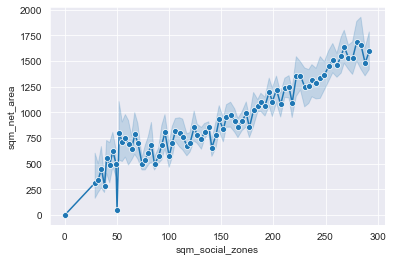

In [31]:
sns.lineplot(data=new_dataset, x='sqm_social_zones', y='sqm_net_area', marker='o')

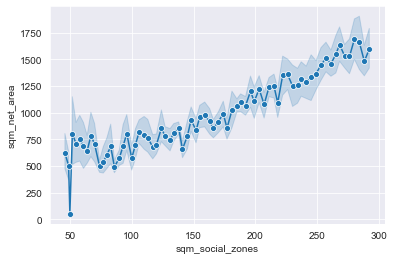

In [32]:
sns.lineplot(data=new_dataset[new_dataset['sqm_social_zones'] > 44], x='sqm_social_zones', y='sqm_net_area', marker='o')

In [33]:
# finding the point
new_dataset[(new_dataset['sqm_social_zones'] == 45)]

,nr_employees,nr_closed_cubicles,nr_meeting_room_total_occupancy,industry,city,sqm_social_zones,sqm_net_area


In [34]:
# removing this point
#new_dataset.drop(65, inplace=True)

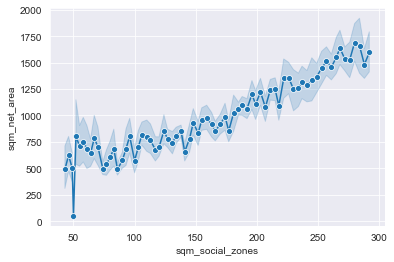

In [35]:
sns.lineplot(data=new_dataset[new_dataset['sqm_social_zones'] > 40], x='sqm_social_zones', y='sqm_net_area', marker='o')

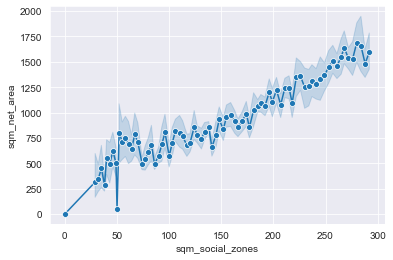

In [36]:
sns.lineplot(data=new_dataset, x='sqm_social_zones', y='sqm_net_area', marker='o')

### Converting categorical values to numeric
In the provided dataset you have two categorical values, city and industry. These values cannot be used in a linear regression model since it only accepts numeric inputs. A solution to this problem is to convert categorical values to numerical.

In [37]:
# Converts tech to 1 and finance to 0
new_dataset['industry_numeric'] = pd.Categorical(new_dataset['industry']).codes
new_dataset.head()

,nr_employees,nr_closed_cubicles,nr_meeting_room_total_occupancy,industry,city,sqm_social_zones,sqm_net_area,industry_numeric
0,31,6,6,tech,Oslo,77,231,1
1,60,13,17,tech,Bergen,177,448,1
2,35,8,7,tech,Trondheim,90,423,1
4,51,28,10,finance,Bergen,145,772,0
5,25,12,5,finance,Trondheim,58,319,0


In [38]:
# remove industry from dataset
new_dataset.drop('industry', axis=1, inplace=True)
new_dataset.head()

,nr_employees,nr_closed_cubicles,nr_meeting_room_total_occupancy,city,sqm_social_zones,sqm_net_area,industry_numeric
0,31,6,6,Oslo,77,231,1
1,60,13,17,Bergen,177,448,1
2,35,8,7,Trondheim,90,423,1
4,51,28,10,Bergen,145,772,0
5,25,12,5,Trondheim,58,319,0


In [39]:
new_dataset['city_numeric'] = pd.Categorical(new_dataset['city']).codes

In [40]:
new_dataset.drop('city', axis=1, inplace=True)
new_dataset.head()

,nr_employees,nr_closed_cubicles,nr_meeting_room_total_occupancy,sqm_social_zones,sqm_net_area,industry_numeric,city_numeric
0,31,6,6,77,231,1,1
1,60,13,17,177,448,1,0
2,35,8,7,90,423,1,2
4,51,28,10,145,772,0,0
5,25,12,5,58,319,0,2


## Training a machine learning model
In this notebook, only one linear regression model will be trained and evaluated. However, when you create a machine learning model you should try with different machine learning methods and hyperparameters, such as learning rate. After trying different models you can choose the best ones and iterate on them, or combined them in a ensemble model.

There is no need to develop a machine learning algorithm from scratch, unless you want to learn how it is done, since scikit learn provides you with many of the basic models out of the box.

In [41]:
from sklearn.linear_model import LinearRegression

In [65]:
# splitting into training and testing dataset
training_dataset, testing_dataset = train_test_split(new_dataset, test_size=0.2, shuffle=True)

In [66]:
# Removing the label from the training dataset
training_x = training_dataset.drop("sqm_net_area", axis=1)
training_y = training_dataset["sqm_net_area"]
training_x.head()

,nr_employees,nr_closed_cubicles,nr_meeting_room_total_occupancy,sqm_social_zones,industry_numeric,city_numeric
1730,27,19,8,64,0,0
623,23,6,6,52,1,0
1701,74,41,15,230,0,0
192,76,18,15,237,1,1
1986,30,14,7,74,0,2


In [67]:
testing_x = testing_dataset.drop("sqm_net_area", axis=1)
testing_y = testing_dataset["sqm_net_area"]
testing_x.head()

,nr_employees,nr_closed_cubicles,nr_meeting_room_total_occupancy,sqm_social_zones,industry_numeric,city_numeric
1838,73,29,18,226,0,2
332,81,20,18,257,1,1
783,56,14,11,163,1,2
1839,50,22,12,141,0,2
30,30,6,5,74,1,1


In [68]:
reg_model = LinearRegression().fit(training_x, training_y)

Testing the accuracy of the model

In [69]:
reg_model.score(testing_x, testing_y)

0.5528467386420851

**What do we see here?**

The score shows the linear regressions accuracy on the testset. Here we can see that the model is 86.4% accurate. This is a pretty good result, but one can also improve on it by for example using a different model. The teams will probably get a different result, since the dataset has been changed since the creation of this notebook.

## Further reading: Evaluate the machine learning model
When you have multiple machine learning models, or just one, a important step will be to evaluate its performance. A common method is to have a testing dataset that is seperate from the training dataset, and check the accuracy of this. The reason one would not validate on the same training dataset is because it will mask overfitting, the production of an analysis that corresponds too closely or exactly to a particular set of data.

Another method of validation is K-Fold Cross Validation. This works by dividing the dataset in to k subsets. 1 of the subsets will be used for testing while the others will be used for training. After the first validation the next subset will be used for testing and the model will be trained with the remaining subsets. The reason to choose K-Fold Cross Validation is since this will mask any imbalance in the dataset and give a more accurate picture of the models performance.

A good resource to read more about sklearn's cross validation functions is their [website](https://scikit-learn.org/stable/modules/cross_validation.html)

## Further reading: Ensemble Learning
A widely used method for improving performance of simple machine learning algorithms is ensemble learning. It is used to combine multiple simpler models into one bigger model that performs better. There are multiple ways of combining models into one, and it is suggested that the teams look into this when they have a good basic model that they can improve upon.

A good read on this topic: [A Gentle Introduction to Ensemble Learning Algorithms](https://machinelearningmastery.com/tour-of-ensemble-learning-algorithms/)

![Apes stronger together meme for ensembled learning](./img/ensemble_learning.png)

---













![Arealize logo](./img/arealize.png)
Arealize AI

Authors: Arealize AI devteam; Petterson M., Sivarasa S., Tidemann M. & Zagorov Y.